Análisis de precios de bolsa
===

La url 'https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/precio_bolsa_nacional/csv/*.csv' contiene los archivos de los precios horarios de bolsa para el mercado electrico colombiano. Descargue la data y responda las preguntas planteadas.

![assets/repo_precios_bolsa.png](assets/repo_precios_bolsa.png)

Realice la descarga de los datos
---

In [1]:
#
# Parte 1: Prueba del código de descarga
#
import requests

owner = "jdvelasq"
repo = "datalabs"
folder = "datasets/precio_bolsa_nacional/csv/"

url = f"https://api.github.com/repos/{owner}/{repo}/contents/{folder}"
response = requests.get(url)

filenames = [file["name"] for file in response.json()]
print(filenames[:5])
print(filenames[-5:])

['199507.csv', '199508.csv', '199509.csv', '199510.csv', '199511.csv']
['202012.csv', '202101.csv', '202102.csv', '202103.csv', '202104.csv']


In [2]:
#
# Parte 2: Descarga y concatenacion
#
import pandas as pd

owner = "jdvelasq"
repo = "datalabs"
folder = "datasets/precio_bolsa_nacional/csv/"

url = f"https://api.github.com/repos/{owner}/{repo}/contents/{folder}"
response = requests.get(url)

base_url = f"https://raw.githubusercontent.com/{owner}/{repo}/master/{folder}"

dfs = []
for file in response.json():
    file_url = base_url + file["name"]
    df = pd.read_csv(file_url)
    dfs.append(df)

df_concat = pd.concat(dfs, ignore_index=True)
print(df_concat.head())

        Fecha      0      1      2     3     4      5      6      7      8   
0  1995-07-21  1.073    1.0    1.0   1.0   1.0    1.0    5.0    6.0    6.0  \
1  1995-07-22  1.073  1.073    1.0   1.0   1.0  1.073  1.303  1.303  1.303   
2  1995-07-23  1.073    1.0    1.0   1.0   1.0    1.0    0.1    1.0    1.0   
3  1995-07-24    1.0    1.0   0.99   1.0   1.0  1.073    3.0    3.0    3.0   
4  1995-07-25   0.99   0.99  0.989  0.99  0.99  1.073  1.263  1.263  1.263   

   ...     14     15     16     17     18     19      20     21     22     23  
0  ...    5.0    1.0    1.0    5.0   12.0  16.67  11.929    5.0    1.0    1.0  
1  ...  1.073    1.0    1.0    1.0  1.303    2.5     2.5  1.303  1.073  1.073  
2  ...    1.0    0.1    0.1    1.0  1.238  1.238   1.238  1.238  1.073    1.0  
3  ...  1.073  1.073    3.0    2.0  18.63   22.5   9.256    3.0  1.073    1.0  
4  ...  1.073  1.073  1.073  1.073  1.263    1.5   1.263  1.263  1.073   0.99  

[5 rows x 25 columns]


Realice la limpieza de los datos
---

In [3]:
#
# Convierte la hora a tipo entero y aplica una operación melt
#
melted = df_concat.melt(id_vars=["Fecha"], var_name="Hora", value_name="Precio")
melted["Hora"] = melted["Hora"].astype(int)
print(melted.head())

        Fecha  Hora Precio
0  1995-07-21     0  1.073
1  1995-07-22     0  1.073
2  1995-07-23     0  1.073
3  1995-07-24     0    1.0
4  1995-07-25     0   0.99


In [4]:
#
# Convierte datos separado por ',' a separados por '.'
#
def str_to_float(x):
    if isinstance(x, str):
        x = x.replace(".", "").replace(",", ".")
        x = float(x)
    return x


melted["Precio"] = melted["Precio"].apply(str_to_float)
print(melted.head())

        Fecha  Hora  Precio
0  1995-07-21     0   1.073
1  1995-07-22     0   1.073
2  1995-07-23     0   1.073
3  1995-07-24     0   1.000
4  1995-07-25     0   0.990


In [5]:
#
# Remueve NAs y datos duplicados
#
melted.dropna(inplace=True)
melted = melted.drop_duplicates(subset=['Fecha', 'Hora'])
print(melted.head())

        Fecha  Hora  Precio
0  1995-07-21     0   1.073
1  1995-07-22     0   1.073
2  1995-07-23     0   1.073
3  1995-07-24     0   1.000
4  1995-07-25     0   0.990


Grafique el precio promedio diario
---

In [6]:
precios_diarios = melted.groupby("Fecha")["Precio"].mean().reset_index()
print(precios_diarios.head())

        Fecha    Precio
0  1995-07-21  4.924333
1  1995-07-22  1.269500
2  1995-07-23  0.953083
3  1995-07-24  4.305917
4  1995-07-25  1.149167


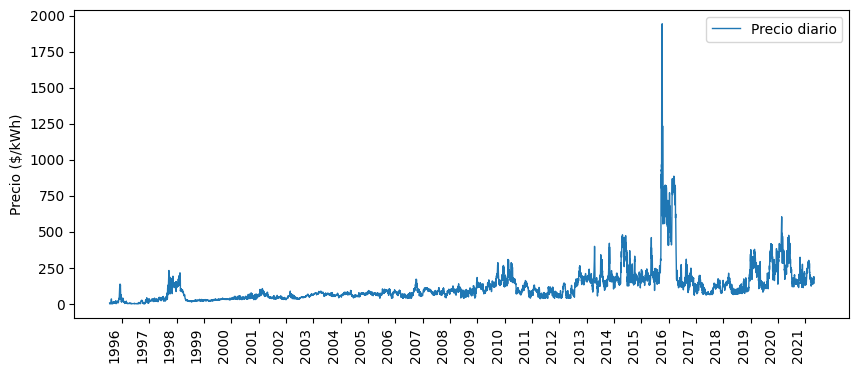

In [7]:
import matplotlib.pyplot as plt

precios_diarios["Fecha"] = pd.to_datetime(precios_diarios["Fecha"])
precios_diarios = precios_diarios.set_index("Fecha")

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(precios_diarios["Precio"], label="Precio diario", color='tab:blue', linewidth=1)

years = pd.date_range(
    start=precios_diarios.index.min(),
    end=precios_diarios.index.max(),
    freq="YS",
)
ax.set_xticks(years)
ax.set_xticklabels(years.strftime("%Y"), rotation=90, ha="right")
ax.set_ylabel("Precio ($/kWh)")
ax.legend()

plt.show()

Analice el perfil horario de precios por dia 
---

In [8]:
melted["maximum"] = melted.groupby("Fecha")["Precio"].transform("max")
print(melted.sort_values(["Fecha", "Hora"]).head(24))

             Fecha  Hora  Precio  maximum
0       1995-07-21     0   1.073    16.67
9522    1995-07-21     1   1.000    16.67
19044   1995-07-21     2   1.000    16.67
28566   1995-07-21     3   1.000    16.67
38088   1995-07-21     4   1.000    16.67
47610   1995-07-21     5   1.000    16.67
57132   1995-07-21     6   5.000    16.67
66654   1995-07-21     7   6.000    16.67
76176   1995-07-21     8   6.000    16.67
85698   1995-07-21     9   6.000    16.67
95220   1995-07-21    10   6.000    16.67
104742  1995-07-21    11   9.256    16.67
114264  1995-07-21    12   9.256    16.67
123786  1995-07-21    13   5.000    16.67
133308  1995-07-21    14   5.000    16.67
142830  1995-07-21    15   1.000    16.67
152352  1995-07-21    16   1.000    16.67
161874  1995-07-21    17   5.000    16.67
171396  1995-07-21    18  12.000    16.67
180918  1995-07-21    19  16.670    16.67
190440  1995-07-21    20  11.929    16.67
199962  1995-07-21    21   5.000    16.67
209484  1995-07-21    22   1.000  

In [9]:
melted["factor"] = melted.apply(lambda row: row.Precio / row.maximum, axis=1)
print(melted.sort_values(["Fecha", "Hora"]).head(24))

             Fecha  Hora  Precio  maximum    factor
0       1995-07-21     0   1.073    16.67  0.064367
9522    1995-07-21     1   1.000    16.67  0.059988
19044   1995-07-21     2   1.000    16.67  0.059988
28566   1995-07-21     3   1.000    16.67  0.059988
38088   1995-07-21     4   1.000    16.67  0.059988
47610   1995-07-21     5   1.000    16.67  0.059988
57132   1995-07-21     6   5.000    16.67  0.299940
66654   1995-07-21     7   6.000    16.67  0.359928
76176   1995-07-21     8   6.000    16.67  0.359928
85698   1995-07-21     9   6.000    16.67  0.359928
95220   1995-07-21    10   6.000    16.67  0.359928
104742  1995-07-21    11   9.256    16.67  0.555249
114264  1995-07-21    12   9.256    16.67  0.555249
123786  1995-07-21    13   5.000    16.67  0.299940
133308  1995-07-21    14   5.000    16.67  0.299940
142830  1995-07-21    15   1.000    16.67  0.059988
152352  1995-07-21    16   1.000    16.67  0.059988
161874  1995-07-21    17   5.000    16.67  0.299940
171396  1995

In [10]:
precios = melted.copy()
precios = precios[['Fecha', 'Hora', 'factor']].pivot(columns='Hora', index='Fecha', values='factor')
precios

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Fecha,,,,,,,,,,,,,,,,,,,,,
1995-07-21,0.064367,0.059988,0.059988,0.059988,0.059988,0.059988,0.299940,0.359928,0.359928,0.359928,...,0.299940,0.059988,0.059988,0.299940,0.719856,1.000000,0.715597,0.299940,0.059988,0.059988
1995-07-22,0.429200,0.429200,0.400000,0.400000,0.400000,0.429200,0.521200,0.521200,0.521200,0.521200,...,0.429200,0.400000,0.400000,0.400000,0.521200,1.000000,1.000000,0.521200,0.429200,0.429200
1995-07-23,0.866721,0.807754,0.807754,0.807754,0.807754,0.807754,0.080775,0.807754,0.807754,0.807754,...,0.807754,0.080775,0.080775,0.807754,1.000000,1.000000,1.000000,1.000000,0.866721,0.807754
1995-07-24,0.044444,0.044444,0.044000,0.044444,0.044444,0.047689,0.133333,0.133333,0.133333,0.155556,...,0.047689,0.047689,0.133333,0.088889,0.828000,1.000000,0.411378,0.133333,0.047689,0.044444
1995-07-25,0.660000,0.660000,0.659333,0.660000,0.660000,0.715333,0.842000,0.842000,0.842000,0.842000,...,0.715333,0.715333,0.715333,0.715333,0.842000,1.000000,0.842000,0.842000,0.715333,0.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,0.666499,0.748732,0.743478,0.666499,0.748732,0.760656,0.780712,0.867513,0.867513,0.867513,...,1.000000,1.000000,0.922335,0.867513,0.922335,0.922335,0.922335,0.867513,0.867513,0.794417
2021-04-27,0.897108,0.899747,0.897108,0.897108,0.897108,0.899747,0.910300,0.915576,0.994724,1.000000,...,1.000000,1.000000,1.000000,0.994724,1.000000,1.000000,1.000000,0.989447,0.915576,0.910300
2021-04-28,0.773982,0.773982,0.773982,0.773982,0.773982,0.836951,0.889619,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.926413,1.000000,1.000000,1.000000,1.000000,0.889619,0.773982


In [11]:
#
# Tipo de dia: laboral, sabado, domingo
# 0: lunes, 6: domingo
#
precios['dia'] =  pd.to_datetime(precios.index).dayofweek
precios['dia'].head() 

Fecha
1995-07-21    4
1995-07-22    5
1995-07-23    6
1995-07-24    0
1995-07-25    1
Name: dia, dtype: int32

In [12]:
precios['dia'] = precios['dia'].map(
    {
        0: 'laboral',
        1: 'laboral',
        2: 'laboral',
        3: 'laboral',
        4: 'laboral',
        5: 'sabado',
        6: 'domingo',
    }
)
precios['dia'].head(10) 

Fecha
1995-07-21    laboral
1995-07-22     sabado
1995-07-23    domingo
1995-07-24    laboral
1995-07-25    laboral
1995-07-26    laboral
1995-07-27    laboral
1995-07-28    laboral
1995-07-29     sabado
1995-07-30    domingo
Name: dia, dtype: object

In [13]:
perfil = precios.groupby('dia').mean()
perfil

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dia,,,,,,,,,,,,,,,,,,,,,
domingo,0.796706,0.774824,0.759140,0.754517,0.752366,0.751639,0.731909,0.766366,0.802744,0.818715,...,0.820583,0.806305,0.798901,0.816903,0.918235,0.983355,0.947389,0.904405,0.851105,0.796325
laboral,0.652196,0.638962,0.629404,0.627891,0.645854,0.696874,0.715443,0.737618,0.768536,0.780433,...,0.804756,0.800624,0.789704,0.783875,0.904592,0.971761,0.864399,0.803225,0.741970,0.685922
sabado,0.735690,0.718502,0.707363,0.700644,0.712506,0.727294,0.735676,0.778595,0.819258,0.835133,...,0.815687,0.801069,0.793155,0.802622,0.918027,0.979776,0.904300,0.853871,0.806726,0.757373


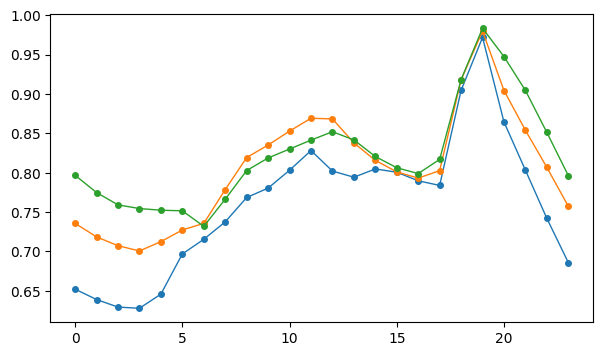

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(perfil.columns, perfil.loc['laboral',:], color='tab:blue', marker='.', linewidth=1, markersize=8)
plt.plot(perfil.columns, perfil.loc['sabado',:], color='tab:orange', marker='.', linewidth=1, markersize=8)
plt.plot(perfil.columns, perfil.loc['domingo',:], color='tab:green', marker='.', linewidth=1, markersize=8)

En que hora se produce el precio máximo?
---

In [15]:
melted_max = melted[['Fecha', 'Hora', 'Precio']].copy()
melted_max["maximum"] = melted_max.groupby("Fecha")["Precio"].transform("max")
melted_max = melted_max.loc[melted_max.Precio == melted.maximum, :]
melted_max

,Fecha,Hora,Precio,maximum
31,1995-08-21,0,2.000,2.000
71,1995-09-30,0,15.000,15.000
143,1995-12-03,0,130.001,130.001
144,1995-12-04,0,160.001,160.001
150,1995-12-10,0,172.660,172.660
...,...,...,...,...
228187,2020-05-25,23,497.900,497.900
228214,2020-06-21,23,242.470,242.470
228229,2020-07-06,23,211.130,211.130
228459,2021-02-21,23,266.510,266.510


In [16]:
#
# Numero de veces en que cada hora es el máximo
#
hist = melted_max.Hora.value_counts()
hist

Hora
19    7998
18    4383
20    3388
11    1872
21    1494
14    1406
12    1390
15    1264
10    1221
13    1187
16     872
9      797
17     721
8      563
22     480
7      314
6      237
5      187
23     175
0      174
1      131
4      117
2      117
3      106
Name: count, dtype: int64

<BarContainer object of 24 artists>

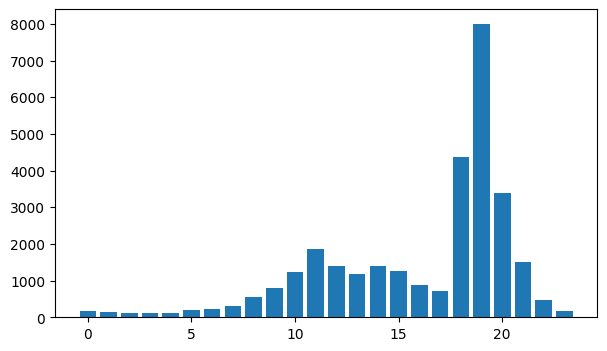

In [17]:
plt.figure(figsize=(7, 4))
plt.bar(hist.index, hist.values, color='tab:blue')